#Shap (SHapley additive explanation) ; a method for explaining machine learning model predictions, it tell which features contributed to the prediction, how much each feature pushed the prediction up or down, and why the model made this decision

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
df= pd.read_csv(r'/content/loan_data_.csv')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import shap
import matplotlib.pyplot as plt


In [ ]:
df.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_purpose,interest_rate,loan_to_income,credit_history_length,credit_score,loan_status
0,26,male,Master,24756,8,RENT,500,MEDICAL,11.41,0.02,2,659,0
1,22,female,High School,32541,1,MORTGAGE,500,PERSONAL,10.46,0.02,4,643,0
2,21,female,Bachelor,23899,1,RENT,700,EDUCATION,12.29,0.03,2,658,0
3,25,male,High School,23980,6,RENT,750,DEBTCONSOLIDATION,12.29,0.03,4,645,0
4,21,female,High School,43107,2,MORTGAGE,800,VENTURE,7.37,0.02,3,609,0


In [ ]:
df.columns

Index(['age', 'gender', 'education', 'income', 'experience', 'home_ownership',
       'loan_amount', 'loan_purpose', 'interest_rate', 'loan_to_income',
       'credit_history_length', 'credit_score', 'loan_status'],
      dtype='object')

In [ ]:
columns_to_encode= ['gender', 'home_ownership', 'education', 'loan_purpose']
label_encoder= LabelEncoder()
for col in columns_to_encode:
  df[col]= label_encoder.fit_transform(df[col])

In [ ]:
X= df.drop(columns= 'loan_status')
y= df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size =0.2 ,random_state= 42)

In [ ]:
model= RandomForestClassifier()
model.fit(X_train, y_train)
accuracy_= model.score(X_test, y_test)
accuracy_

0.8955

In [ ]:
sample= X_train.iloc[4:5]
sample

,age,gender,education,income,experience,home_ownership,loan_amount,loan_purpose,interest_rate,loan_to_income,credit_history_length,credit_score
6669,26,1,1,67287,8,0,10000,0,7.51,0.15,3,639


In [ ]:
prediction= model.predict(sample)[0]
probability= model.predict_proba(sample)
result = "Approved" if prediction ==1 else "Denied"
result

'Approved'

In [ ]:
explainer= shap.TreeExplainer(model)

In [28]:
shap_values= explainer.shap_values(sample)

In [29]:
shap_values

array([[[ 0.00993106, -0.00993106],
        [-0.00863912,  0.00863912],
        [-0.0071662 ,  0.0071662 ],
        [-0.19611979,  0.19611979],
        [-0.0527336 ,  0.0527336 ],
        [-0.08253779,  0.08253779],
        [-0.05902288,  0.05902288],
        [-0.05075369,  0.05075369],
        [ 0.10620274, -0.10620274],
        [ 0.00281558, -0.00281558],
        [ 0.0295884 , -0.0295884 ],
        [-0.00944597,  0.00944597]]])

In [31]:
shap_values.shape

(1, 12, 2)

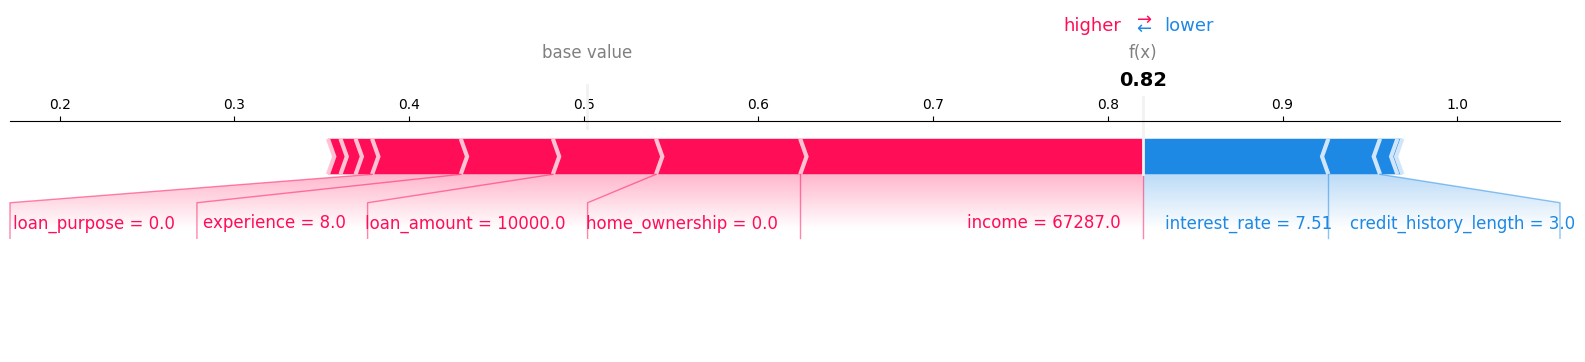

In [33]:

shap.plots.force(base_value=explainer.expected_value[1],
    shap_values=shap_values[..., 1],  # SHAP values for the Aproved
features=sample.values[0],  # Feature values for the sample
    feature_names=X_test.columns,
    matplotlib=True
)

In [40]:
shap_df = pd.DataFrame({
    'feature': sample.columns,
    'feature value': sample.iloc[0, :].values,
    'SHAP Value': sample.iloc[0, :].values
})


In [41]:
shap_df = shap_df.sort_values(by='SHAP Value', ascending=False)
shap_df

,feature,feature value,SHAP Value
3,income,67287.00,67287.00
6,loan_amount,10000.00,10000.00
11,credit_score,639.00,639.00
0,age,26.00,26.00
4,experience,8.00,8.00
8,interest_rate,7.51,7.51
10,credit_history_length,3.00,3.00
1,gender,1.00,1.00
2,education,1.00,1.00
9,loan_to_income,0.15,0.15
